In [1]:
# Import our dependencies
import pandas as pd
import sqlalchemy
import psycopg2
#from config import db_password
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import tensorflow as tf

In [2]:
# Read Bronx Sales Prices
file_path1 = "Resources/bronx_annual_sales20.csv"
bronx_df = pd.read_csv(file_path1)
bronx_df = bronx_df.dropna()
bronx_df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A5,418 EAST 180 STREET,1.0,1526.0,0
1,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4455 PARK AVENUE,1.0,1587.0,458000
2,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4451 PARK AVENUE,1.0,1495.0,275000
3,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4451 PARK AVENUE,1.0,1495.0,475000
4,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A9,2327 WASHINGTON AVE,1.0,1260.0,165000


In [3]:
# Read Brooklyn sales prices 
file_path2 = "Resources/brooklyn_annual_sales20.csv"
brooklyn_df = pd.read_csv(file_path2)
brooklyn_df = brooklyn_df.dropna()
brooklyn_df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,S1,8684 15TH AVENUE,2.0,4080.0,1300000
1,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A5,14 BAY 10TH STREET,1.0,1428.0,849000
2,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A5,30 BAY 10TH STREET,1.0,1428.0,75000
3,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A9,43 BAY 11TH STREET,1.0,1052.0,0
4,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A9,8645 BAY 16TH STREET,1.0,1456.0,830000


In [4]:
# Read Manhattan sales prices
file_path3 = "Resources/manhattan_annual_sales20.csv"
manhattan_df = pd.read_csv(file_path3)
manhattan_df = manhattan_df.dropna()
manhattan_df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,1,ALPHABET CITY,32 HOSPITAL AND HEALTH FACILITIES,I5,538-542 EAST 13TH STREET,1,6681,0
1,2020,1,ALPHABET CITY,37 RELIGIOUS FACILITIES,M1,345 EAST 4TH STREET,1,3496,0
2,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"229 EAST 2ND STREET, STOR",1,0,1900000
3,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"229 EAST 2ND STREET, STOR",1,0,1630000
4,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"631 EAST 9TH STREET, S1",1,0,1350000


In [5]:
# Read Queens sales prices
file_path4 = "Resources/queens_annual_sales20.csv"
queens_df = pd.read_csv(file_path4)
queens_df = queens_df.dropna()
queens_df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,4,AIRPORT JFK,39 TRANSPORTATION FACILITIES,V7,N/A ROCKAWAY BLVD,0.0,0.0,4121000
1,2020,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,A5,19-62 81ST STREET,1.0,1224.0,584569
2,2020,4,AIRPORT LA GUARDIA,12 CONDOS - WALKUP APARTMENTS,R2,"19-37 80TH STREET, 1",1.0,0.0,420000
3,2020,4,ARVERNE,01 ONE FAMILY DWELLINGS,A5,3-20 BEACH 41 STREET,1.0,1476.0,300000
4,2020,4,ARVERNE,01 ONE FAMILY DWELLINGS,A5,336 BEACH 41ST STREET,1.0,1350.0,360000


In [6]:
# Read Staten Island sales prices
file_path5 = "Resources/staten_island_annual_sales20.csv"
staten_island_df = pd.read_csv(file_path5)
staten_island_df = staten_island_df.dropna()
staten_island_df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A5,4726 AMBOY ROAD,1.0,910.0,0
1,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,119 LENZIE STREET,1.0,3660.0,315000
2,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,118 ELMBANK STREET,1.0,2580.0,450000
3,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,7 SANDGAP STREET,1.0,1222.0,525000
4,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A5,91 EAGAN AVENUE,1.0,1854.0,480000


In [7]:
# Read Annualized city sales 2019
file_path6 = "Resources/annualized_citywide_sale19.csv"
annualized_citywide_sale19_df = pd.read_csv(file_path6)
annualized_citywide_sale19_df = annualized_citywide_sale19_df.dropna()
annualized_citywide_sale19_df.head()

,YEAR,BOROUGH,BUILDING CLASS CATEGORY,NUMBER OF SALES,MINIMUM SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,MAXIMUM SALE PRICE
0,2019,Manhattan,01 ONE FAMILY DWELLINGS,101,"375,000","9,256,384","7,200,000","77,100,000"
1,2019,Manhattan,02 TWO FAMILY DWELLINGS,74,"425,000","5,454,151","3,925,000","25,500,000"
2,2019,Manhattan,03 THREE FAMILY DWELLINGS,42,"531,527","4,400,861","2,375,000","24,000,000"
3,2019,Bronx,01 ONE FAMILY DWELLINGS,"1,019","200,000","548,758","485,000","5,000,000"
4,2019,Bronx,02 TWO FAMILY DWELLINGS,"1,364","200,000","596,455","600,000","2,400,000"


In [8]:
# Read Annualized city sales 2020
file_path7 = "Resources/annualized_citywide_sale20.csv"
annualized_citywide_sale20_df = pd.read_csv(file_path7)
annualized_citywide_sale20_df.dropna(axis=0, how='all',inplace=True)
annualized_citywide_sale20_df = annualized_citywide_sale20_df.dropna(axis='columns')
annualized_citywide_sale20_df.head()

,YEAR,BOROUGH,BUILDING CLASS CATEGORY,NUMBER OF SALES,MINIMUM SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,MAXIMUM SALE PRICE
0,2020,MANHATTAN,01 ONE FAMILY DWELLINGS,71,"1,250,000","10,068,400","8,300,000","38,000,000"
1,2020,MANHATTAN,02 TWO FAMILY DWELLINGS,54,"642,000","5,899,924","4,225,000","31,000,000"
2,2020,MANHATTAN,03 THREE FAMILY DWELLINGS,21,"319,393","3,511,994","2,650,000","8,405,000"
3,2020,BRONX,01 ONE FAMILY DWELLINGS,821,"200,000","563,110","520,000","4,325,000"
4,2020,BRONX,02 TWO FAMILY DWELLINGS,"1,015","200,000","852,118","653,500","87,400,000"


In [9]:
# Read Annualized city sales 2019
file_path8 = "Resources/inflation_data_1701to2022.csv"
inflation_data_1701to2022_df = pd.read_csv(file_path8)
inflation_data_1701to2022_df = inflation_data_1701to2022_df.dropna()
inflation_data_1701to2022_df.head()

,year,amount,inflation rate
0,1701,1.00,0.05
1,1702,0.91,-0.09
2,1703,0.91,0.00
3,1704,1.07,0.18
4,1705,0.98,-0.09


# Machine Learning
Linear Regression Model

In [10]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [11]:
df = pd.read_csv(Path('Resources/bronx_annual_sales20.csv'))
df.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A5,418 EAST 180 STREET,1.0,1526.0,0
1,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4455 PARK AVENUE,1.0,1587.0,458000
2,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4451 PARK AVENUE,1.0,1495.0,275000
3,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A1,4451 PARK AVENUE,1.0,1495.0,475000
4,2020,2,BATHGATE,01 ONE FAMILY DWELLINGS,A9,2327 WASHINGTON AVE,1.0,1260.0,165000


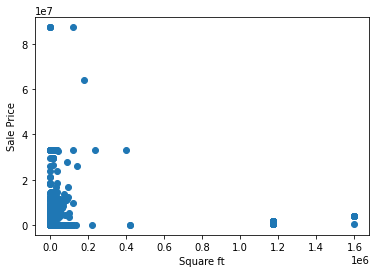

In [12]:
plt.scatter(df.GROSS_SQ_FT, df.SALE_PRICE)
plt.xlabel('Square ft')
plt.ylabel('Sale Price')
plt.show()

In [13]:
df2 = pd.read_csv(Path('Resources/brooklyn_annual_sales20.csv'))
df2.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,S1,8684 15TH AVENUE,2.0,4080.0,1300000
1,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A5,14 BAY 10TH STREET,1.0,1428.0,849000
2,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A5,30 BAY 10TH STREET,1.0,1428.0,75000
3,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A9,43 BAY 11TH STREET,1.0,1052.0,0
4,2020,3,BATH BEACH,01 ONE FAMILY DWELLINGS,A9,8645 BAY 16TH STREET,1.0,1456.0,830000


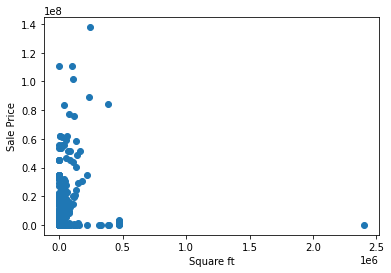

In [14]:
plt.scatter(df2.GROSS_SQ_FT, df2.SALE_PRICE)
plt.xlabel('Square ft')
plt.ylabel('Sale Price')
plt.show()

In [15]:
df3 = pd.read_csv(Path('Resources/manhattan_annual_sales20.csv'))
df3.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,1,ALPHABET CITY,32 HOSPITAL AND HEALTH FACILITIES,I5,538-542 EAST 13TH STREET,1,6681,0
1,2020,1,ALPHABET CITY,37 RELIGIOUS FACILITIES,M1,345 EAST 4TH STREET,1,3496,0
2,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"229 EAST 2ND STREET, STOR",1,0,1900000
3,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"229 EAST 2ND STREET, STOR",1,0,1630000
4,2020,1,ALPHABET CITY,47 CONDO NON-BUSINESS STORAGE,RS,"631 EAST 9TH STREET, S1",1,0,1350000


In [16]:
dfGross_SQ_Ft3= df3[["GROSS_SQ_FT", "SALE_PRICE"]].copy()

In [17]:
dfGross_SQ_Ft3.replace(0, np.nan, inplace=True)

In [18]:
dfGross_SQ_Ft3.dropna(inplace=True)

In [19]:
dfGross_SQ_Ft3

,GROSS_SQ_FT,SALE_PRICE
8,17940.0,12333333.0
9,8700.0,6166667.0
13,35600.0,3607000.0
14,35600.0,3625000.0
17,3630.0,9000000.0
...,...,...
7388,81339.0,37750000.0
7392,302399.0,93836434.0
7393,407555.0,380600000.0
7394,657592.0,423957600.0


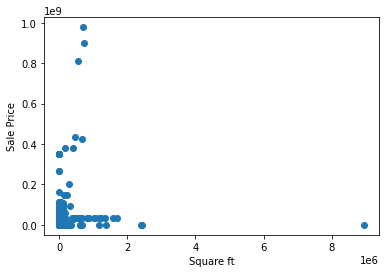

In [20]:
plt.scatter(df3.GROSS_SQ_FT, df3.SALE_PRICE)
plt.xlabel('Square ft')
plt.ylabel('Sale Price')
plt.show()

In [21]:
X = dfGross_SQ_Ft3.GROSS_SQ_FT.values.reshape(-1, 1)

In [22]:
X[:5]

array([[17940.],
       [ 8700.],
       [35600.],
       [35600.],
       [ 3630.]])

In [23]:
X.shape

(705, 1)

In [24]:
y = dfGross_SQ_Ft3.SALE_PRICE

In [25]:
model = LinearRegression()

In [26]:
model.fit(X, y)

LinearRegression()

In [27]:
y_pred = model.predict(X)
print(y_pred.shape)

(705,)


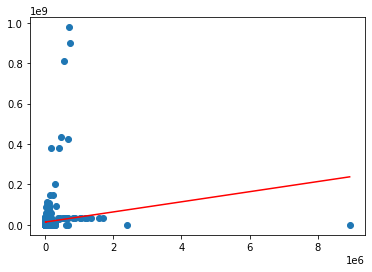

In [28]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [29]:
df4 = pd.read_csv(Path('Resources/queens_annual_sales20.csv'))
df4.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,4,AIRPORT JFK,39 TRANSPORTATION FACILITIES,V7,N/A ROCKAWAY BLVD,0.0,0.0,4121000
1,2020,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,A5,19-62 81ST STREET,1.0,1224.0,584569
2,2020,4,AIRPORT LA GUARDIA,12 CONDOS - WALKUP APARTMENTS,R2,"19-37 80TH STREET, 1",1.0,0.0,420000
3,2020,4,ARVERNE,01 ONE FAMILY DWELLINGS,A5,3-20 BEACH 41 STREET,1.0,1476.0,300000
4,2020,4,ARVERNE,01 ONE FAMILY DWELLINGS,A5,336 BEACH 41ST STREET,1.0,1350.0,360000


In [30]:
dfGross_SQ_Ft4= df4[["GROSS_SQ_FT", "SALE_PRICE"]].copy()

In [31]:
dfGross_SQ_Ft4.replace(0, np.nan, inplace=True)

In [32]:
dfGross_SQ_Ft4.dropna(inplace=True)

In [33]:
dfGross_SQ_Ft4

,GROSS_SQ_FT,SALE_PRICE
1,1224.0,584569.0
3,1476.0,300000.0
4,1350.0,360000.0
5,1332.0,465000.0
6,1224.0,235000.0
...,...,...
21682,10000.0,3775000.0
21683,5144.0,4131000.0
21685,2025.0,1425000.0
21686,16800.0,6500000.0


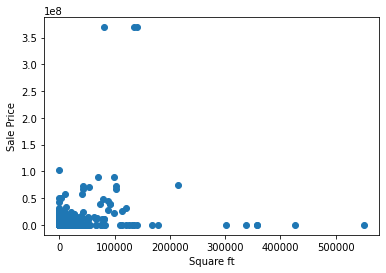

In [34]:
plt.scatter(df4.GROSS_SQ_FT, df4.SALE_PRICE)
plt.xlabel('Square ft')
plt.ylabel('Sale Price')
plt.show()

In [35]:
X = dfGross_SQ_Ft4.GROSS_SQ_FT.values.reshape(-1, 1)

In [36]:
X[:5]

array([[1224.],
       [1476.],
       [1350.],
       [1332.],
       [1224.]])

In [37]:
X.shape

(8282, 1)

In [38]:
y = dfGross_SQ_Ft4.SALE_PRICE

In [39]:
model = LinearRegression()

In [40]:
model.fit(X, y)

LinearRegression()

In [41]:
y_pred = model.predict(X)
print(y_pred.shape)

(8282,)


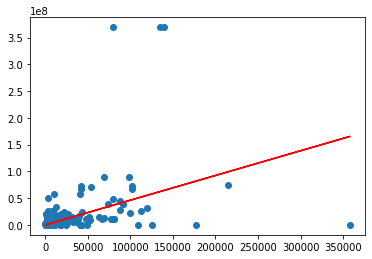

In [42]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [43]:
df5 = pd.read_csv(Path('Resources/staten_island_annual_sales20.csv'))
df5.head()

,YEAR,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,ADDRESS,TOTAL_UNITS,GROSS_SQ_FT,SALE_PRICE
0,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A5,4726 AMBOY ROAD,1.0,910.0,0
1,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,119 LENZIE STREET,1.0,3660.0,315000
2,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,118 ELMBANK STREET,1.0,2580.0,450000
3,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A1,7 SANDGAP STREET,1.0,1222.0,525000
4,2020,5,ANNADALE,01 ONE FAMILY DWELLINGS,A5,91 EAGAN AVENUE,1.0,1854.0,480000


In [44]:
dfGross_SQ_Ft5= df5[["GROSS_SQ_FT", "SALE_PRICE"]].copy()

In [45]:
dfGross_SQ_Ft5.replace(0, np.nan, inplace=True)

In [46]:
dfGross_SQ_Ft5.dropna(inplace=True)

In [47]:
dfGross_SQ_Ft5

,GROSS_SQ_FT,SALE_PRICE
1,3660.0,315000.0
2,2580.0,450000.0
3,1222.0,525000.0
4,1854.0,480000.0
5,2300.0,720000.0
...,...,...
7550,1850.0,665000.0
7552,2400.0,775000.0
7553,2250.0,500000.0
7554,1980.0,537000.0


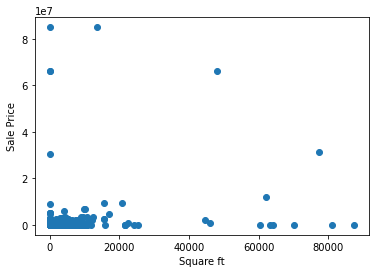

In [48]:
plt.scatter(df5.GROSS_SQ_FT, df5.SALE_PRICE)
plt.xlabel('Square ft')
plt.ylabel('Sale Price')
plt.show()

In [49]:
X = dfGross_SQ_Ft5.GROSS_SQ_FT.values.reshape(-1, 1)

In [50]:
X[:5]

array([[3660.],
       [2580.],
       [1222.],
       [1854.],
       [2300.]])

In [51]:
X.shape

(4366, 1)

In [52]:
y = dfGross_SQ_Ft5.SALE_PRICE

In [53]:
model = LinearRegression()

In [54]:
model.fit(X, y)

LinearRegression()

In [55]:
y_pred = model.predict(X)
print(y_pred.shape)

(4366,)


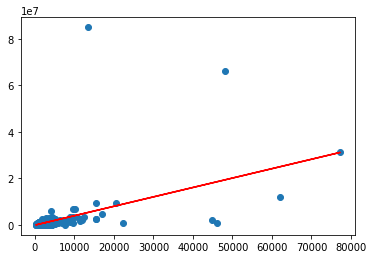

In [56]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()